**THE SPARKS FOUNDATION**

**TASK 1: PREDICTION USING SUPERVISED ML**

Objective: To predict the marks obtained by the student based on the no. of their study hours.

Dataset: http://bit.ly/w-data

Author: **RHYTHM RASTOGI**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dataset =  "http://bit.ly/w-data"
data = pd.read_csv(dataset)
data.shape # to check the dimensions of the data 

(25, 2)

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# to check for null values in the dataset
data.isnull == True

False

There are no null values hence, we can proceed.

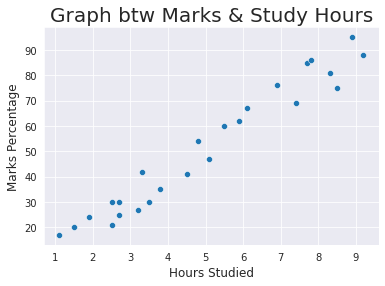

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Graph btw Marks & Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the graph, we can say that there is positive correlation between Marks obtained and the hours studied by the student.

In [ ]:
print(data.corr()) # to find correlation between hours and scores

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**Preparing the dataset**

In [ ]:
# defining x and y
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting scores
pred_y = regressor.predict(x_test)
predictions = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [m for m in pred_y]})
predictions

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


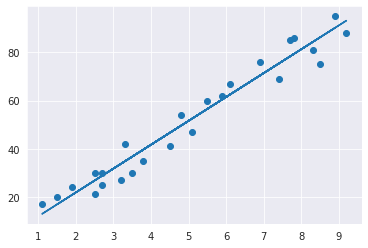

In [ ]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [ ]:
# Comparing Actual vs Predicted marks
compared_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})  
compared_scores 

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the Model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred_y)) 

Mean Absolute Error: 4.183859899002982


Since the value of Mean Absolute Error is less, the chances of model going wrong is very less.

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hours_per_day = [9.25]
pred_score = regressor.predict([hours_per_day])
print("No of Hours = {}".format(hours_per_day[0]))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


If a student studies 9.25 hrs per day he is likely to score  93.69173248737539 marks.